<a href="https://colab.research.google.com/github/yustinaivanova/math_netology/blob/master/dz_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 3. Математика для data sciense. Нетология.

#### Решить систему линейных уравнений:

![alt text](https://italiandirectory.eu/wp-content/ql-cache/quicklatex.com-34a5602e13176cbddcfd35cca34478fe_l3.svg)

In [1]:
import numpy as np

"""
Запишем коэффициенты перед неизвестными в матрицу А, свободные коэффициенты - в матрицу В  
Решение получим через np.linalg.solve в виде вектора из 3 значений  """

A=[[2,1,1],
   [1,3,2],
   [1,0,0]]
B=[4,5,6]

a = np.array(A)
b = np.array(B)
x = np.linalg.solve(a, b)
x

array([  6.,  15., -23.])

In [2]:
"""
Проверка правильности решения """

np.allclose(np.dot(a, x), b)

True

#### Задача
Анна выбирает тарифный план для телефонной связи. Первый план, T1, стоит 20 долларов в месяц, каждый звонок стоит 25 центов в минуту. Второй тарифный план, T2, стоит 40долларов в месяц, но звонки стоят 8 центов в минуту. Какой план ей выбрать, если Анна звонит не более 117 минут в месяц?

Составим задачу в системе линейных уравнений. 

Количество минут - независимая переменная, будет нашим x. Стоимость тарифа - зависимая величина, будет нашим y. 

Написать систему уравнений для данной задачи, построить график, найти точку пересечения прямых. 
Сделать вывод о том, какой тариф использовать лучше для Анны.

#### Решение

Система уравнений по этой задаче будет выглядеть так:
$$\left\{\begin{matrix}
0.25x+20=y\\ 
0.08x+40=y
\end{matrix}\right.$$

После преобразований:
$$\left\{\begin{matrix}
0.25x-y=-20\\ 
0.08x-y=-40
\end{matrix}\right.$$

Решением этой системы будет такая пара х и у (то есть количество минут в месяц и расходы на связь в месяц), при которых тарифы будут равны

Перепишем систему уравнений в матричной форме:
$$\begin{bmatrix}
0.25 & -1\\ 
0.08 & -1
\end{bmatrix}\cdot \begin{bmatrix}
x\\ 
y
\end{bmatrix}=\begin{bmatrix}
-20\\ 
-40
\end{bmatrix}$$

In [3]:
A=[[0.25,-1],
   [0.08,-1]]
B=[-20,-40]

A = np.array(A)
B = np.array(B)
X = np.linalg.solve(A, B)
X

array([117.64705882,  49.41176471])

Итак, получили, что тарифы будут стоить одинаковое количество денег (у = 49.41 доллара) если разговаривать х = 117.65 минут в месяц. Чтобы понять, какой тариф выгоднее при меньшем количестве проговоренных минут, построим график

In [4]:
import matplotlib.pyplot as plt

x = np.arange(110, 130)
y = 0.25*x+20
y1 = 0.08*x+40

# plt.figure()
fig, ax = plt.subplots()
plt.plot(x, y, color='blue')
plt.plot(x, y1, color='red')
ax.vlines(X[0], y.min(), y.max(), color = 'g', linestyles='dashed')
plt.xlim(110, 125)
plt.ylim(48, 51)

plt.legend(['T1','T2','x = {}'.format(round(X[0],2))])
plt.show()

<Figure size 640x480 with 1 Axes>

На графике видно, что при количестве потраченных минут менее 117 тариф Т1 выгоднее

#### Загрузить датасет Boston houses. Выбрать 3-хмерное пространство (3 атрибута из таблицы), взять 3 дома по данному трехмерному пространству, доказать, что данные векторы не компланарны.

In [5]:
from sklearn.datasets import load_boston
import pandas as pd

boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
price = boston_dataset.target

In [6]:
"""
Выберем первые три дома и атрибуты NOX, RM, AGE  """
boston3=boston[['NOX', 'RM', 'AGE']].head(3)
boston3

,NOX,RM,AGE
0,0.538,6.575,65.2
1,0.469,6.421,78.9
2,0.469,7.185,61.1


In [7]:
"""
Задаем векторы """

x0=np.array(boston3.loc[0])
x1=np.array(boston3.loc[1])
x2=np.array(boston3.loc[2])

In [8]:
"""
Проверяем на компланарность через нахождение определителя матрицы, составленной из координат векторов  """
A=np.array([x0,x1,x2])
print(np.linalg.det(A))

-15.668871


Определитель матрицы не равен нулю, следовательно, векторы некомпланарны

#### Для матрицы, полученной на предыдущей задачи, посчитать собственный вектор(v). Умножить собственный вектор на матрицу (Av). Сделать график. Во сколько раз Av отличается от v?

In [9]:
"""
Посчитаем собственные векторы с помощью метода np.linalg.eig() """

e_vals, e_vecs = np.linalg.eig(A)
print('Исходная матрица: \n', A)

print('Собственные вектора: \n', e_vecs)
print('Собственные значения: ', e_vals)

Исходная матрица: 
 [[ 0.538  6.575 65.2  ]
 [ 0.469  6.421 78.9  ]
 [ 0.469  7.185 61.1  ]]
Собственные вектора: 
 [[ 0.54995443  0.9989193  -0.29026294]
 [ 0.64993482 -0.04642575 -0.9506617 ]
 [ 0.52453298 -0.00221144  0.10949778]]
Собственные значения:  [70.49447191  0.08807865 -2.52355056]


In [10]:
D=np.array([[5, 1], [3, 3]])
val, vec = np.linalg.eig(D)
val, vec

(array([6., 2.]), array([[ 0.70710678, -0.31622777],
        [ 0.70710678,  0.9486833 ]]))

У нас получилось 3 собственных вектора для  матрицы А. Умножим исходную матрицу на первый вектор

In [11]:
v=e_vecs[:,0]
Av =A.dot(v)
Av

array([38.76874723, 45.81681224, 36.9766754 ])

(-1, 70)

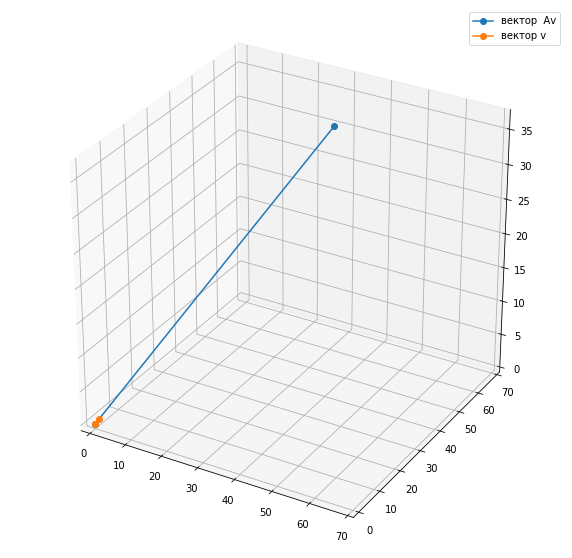

In [12]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

plt.plot([0,Av[0]],[0,Av[1]],[0,Av[2]], '-o')
plt.plot([0,v[0]], [0,v[1]],[0,v[2]], '-o')
plt.legend(['вектор  Av', 'вектор v'])
plt.ylim(-1, 70)
plt.xlim(-1, 70)

Собственное значение первого вектора равно 70.49, именно во столько раз вектор Av длиннее вектора v

Умножим исходную матрицу на третий вектор

In [13]:
v=e_vecs[:,2]
Av =A.dot(v)
Av

array([ 0.73249321,  2.39904285, -0.27632319])

(-1, 10)

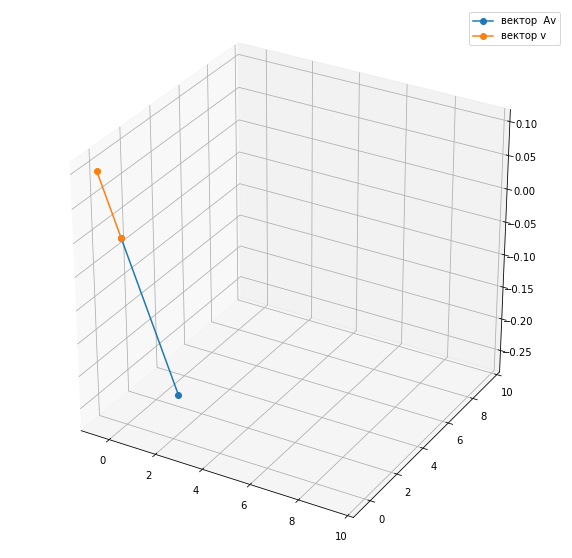

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

plt.plot([0,Av[0]],[0,Av[1]],[0,Av[2]], '-o')
plt.plot([0,v[0]], [0,v[1]],[0,v[2]], '-o')
plt.legend(['вектор  Av', 'вектор v'])
plt.ylim(-1, 10)
plt.xlim(-1, 10)

В этом случае векторы Av и v направлены в разные стороны, так как собственное значение отрицательно (-2.52)

### Задание повышенного уровня.

Как посчитать интеграл полинома, полученного в домашнем задании №2, при полиномиальной регрессии?

In [118]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from numpy import linalg as LA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import pandas as pd

boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
price = boston_dataset.target
  
x = boston.LSTAT

x = np.array(x).reshape(-1, 1)
y = price

poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(x) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression()
model = lin2.fit(X_poly, y)


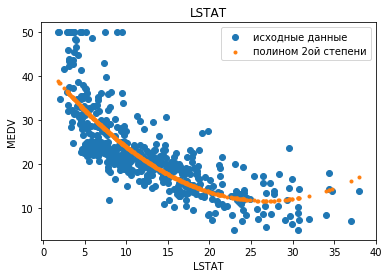

In [119]:
y_pred = model.predict(poly.fit_transform(x))
plt.scatter(x, y, marker='o')
plt.scatter(x, y_pred, marker='.')
#plt.scatter(x, 0.04354689*x**2-2.3328211*x+42.86200732816948,marker='.')

plt.title('LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend(['исходные данные', 'полином 2ой степени'])
plt.show()

Чтобы получить коэффициенты полученной параболы, возьмем произвольные 3 значения х и значения у, соответсвующие выбранным х в предсказании, сделанном моделью

In [120]:
boston=x

In [121]:
x=[]
y=[]
for i in range(3):
    x.append(boston[i+5][0])
    y.append(y_pred[i+5])
x,y

([5.21, 12.43, 19.15],
 [31.890050525544943, 20.593248862118212, 14.15810742872561])

Подставляя значения х и у в формулу полинома второй степени
$ax^2+bx+c=y$
получим систему уравнений из 3 неизвестных

In [122]:
A=[]
B=[]
for i in range(3):
    temp=[]
    temp.append(x[i]**2)
    temp.append(x[i])
    temp.append(1)
    A.append(temp)
    B.append(y[i])
A=np.array(A)
B=np.array(B)

Решим ее

In [123]:
X = np.linalg.solve(A, B)
X

array([ 0.04354689, -2.3328211 , 42.86200733])

Теперь найдем зону определения нашей функции. Это будет отрезок между минимальным и максимальным Х

In [124]:
xmin=min(boston)[0] 
xmax=max(boston)[0]
xmin, xmax

(1.73, 37.97)

Теперь, зная коэффициенты и зону определения функции, можно посчитать определенный интеграл функции на отрезке, равном зоне ее определения

In [125]:
import scipy.integrate as spint
def f(x):
    return X[0]*x**2+X[1]*x+X[2]

spint.quad(f,xmin,xmax)[0]

669.713146490837